In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn

In [2]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/Bank%20Data.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997


In [5]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [6]:
data = data[['Annual_Income', 'Monthly_Inhand_Salary' , 'Num_Bank_Accounts' , 'Outstanding_Debt' ,'Credit_Utilization_Ratio' ,'Credit_History_Age' , 'Total_EMI_per_month' , 'Payment_Behaviour' ]]


In [7]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Payment_Behaviour
0,19114.12,1824.843333,3,809.98,35.030402,22 Years and 9 Months,49.574949,Low_spent_Small_value_payments
1,19114.12,1824.843333,3,809.98,33.053114,22 Years and 10 Months,49.574949,High_spent_Medium_value_payments
2,19114.12,1824.843333,3,809.98,33.811894,NaN,49.574949,Low_spent_Medium_value_payments
3,19114.12,NaN,3,809.98,32.430559,23 Years and 0 Months,49.574949,High_spent_Medium_value_payments
4,34847.84,3037.986667,2,605.03,25.926822,27 Years and 3 Months,18.816215,High_spent_Large_value_payments


In [8]:
data[['Years', 'Months']] = data['Credit_History_Age'].str.extract(r'(\d+) Years and (\d+) Months')
data[['Years', 'Months']] = data[['Years', 'Months']].fillna(0).astype(int)

# Conversion factors
days_in_year = 365.25
days_in_month = 30.44

# Applying the conversion to the entire DataFrame
data['Total_Days'] = (data['Years'] * days_in_year) + (data['Months'] * days_in_month)

# Drop intermediate columns if needed
data = data.drop(['Years', 'Months'], axis=1)


In [9]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Payment_Behaviour,Total_Days
0,19114.12,1824.843333,3,809.98,35.030402,22 Years and 9 Months,49.574949,Low_spent_Small_value_payments,8309.46
1,19114.12,1824.843333,3,809.98,33.053114,22 Years and 10 Months,49.574949,High_spent_Medium_value_payments,8339.90
2,19114.12,1824.843333,3,809.98,33.811894,NaN,49.574949,Low_spent_Medium_value_payments,0.00
3,19114.12,NaN,3,809.98,32.430559,23 Years and 0 Months,49.574949,High_spent_Medium_value_payments,8400.75
4,34847.84,3037.986667,2,605.03,25.926822,27 Years and 3 Months,18.816215,High_spent_Large_value_payments,9953.07


In [10]:
data = data.drop('Credit_History_Age', axis=1)
data = data.rename(columns={'Total_Days': 'Credit_History_Age(days)'})

In [11]:
data.head(3)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Payment_Behaviour,Credit_History_Age(days)
0,19114.12,1824.843333,3,809.98,35.030402,49.574949,Low_spent_Small_value_payments,8309.46
1,19114.12,1824.843333,3,809.98,33.053114,49.574949,High_spent_Medium_value_payments,8339.90
2,19114.12,1824.843333,3,809.98,33.811894,49.574949,Low_spent_Medium_value_payments,0.00


# target variable

In [12]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: count, dtype: int64

In [13]:
data = data[data['Payment_Behaviour'] != '!@9#%8']

In [14]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
Name: count, dtype: int64

# Data Exploration and Preprocessing:

In [15]:
data.isnull().sum()

Annual_Income                  0
Monthly_Inhand_Salary       6949
Num_Bank_Accounts              0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
Payment_Behaviour              0
Credit_History_Age(days)       0
dtype: int64

In [16]:
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(data['Monthly_Inhand_Salary'].mean())

In [17]:
data.isnull().sum()

Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Payment_Behaviour           0
Credit_History_Age(days)    0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
data['Annual_Income'] = data['Annual_Income'].str.replace('_', '').astype(float)
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.replace('_', '').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46200 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             46200 non-null  float64
 1   Monthly_Inhand_Salary     46200 non-null  float64
 2   Num_Bank_Accounts         46200 non-null  int64  
 3   Outstanding_Debt          46200 non-null  float64
 4   Credit_Utilization_Ratio  46200 non-null  float64
 5   Total_EMI_per_month       46200 non-null  float64
 6   Payment_Behaviour         46200 non-null  object 
 7   Credit_History_Age(days)  46200 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB


<Axes: xlabel='Payment_Behaviour', ylabel='count'>

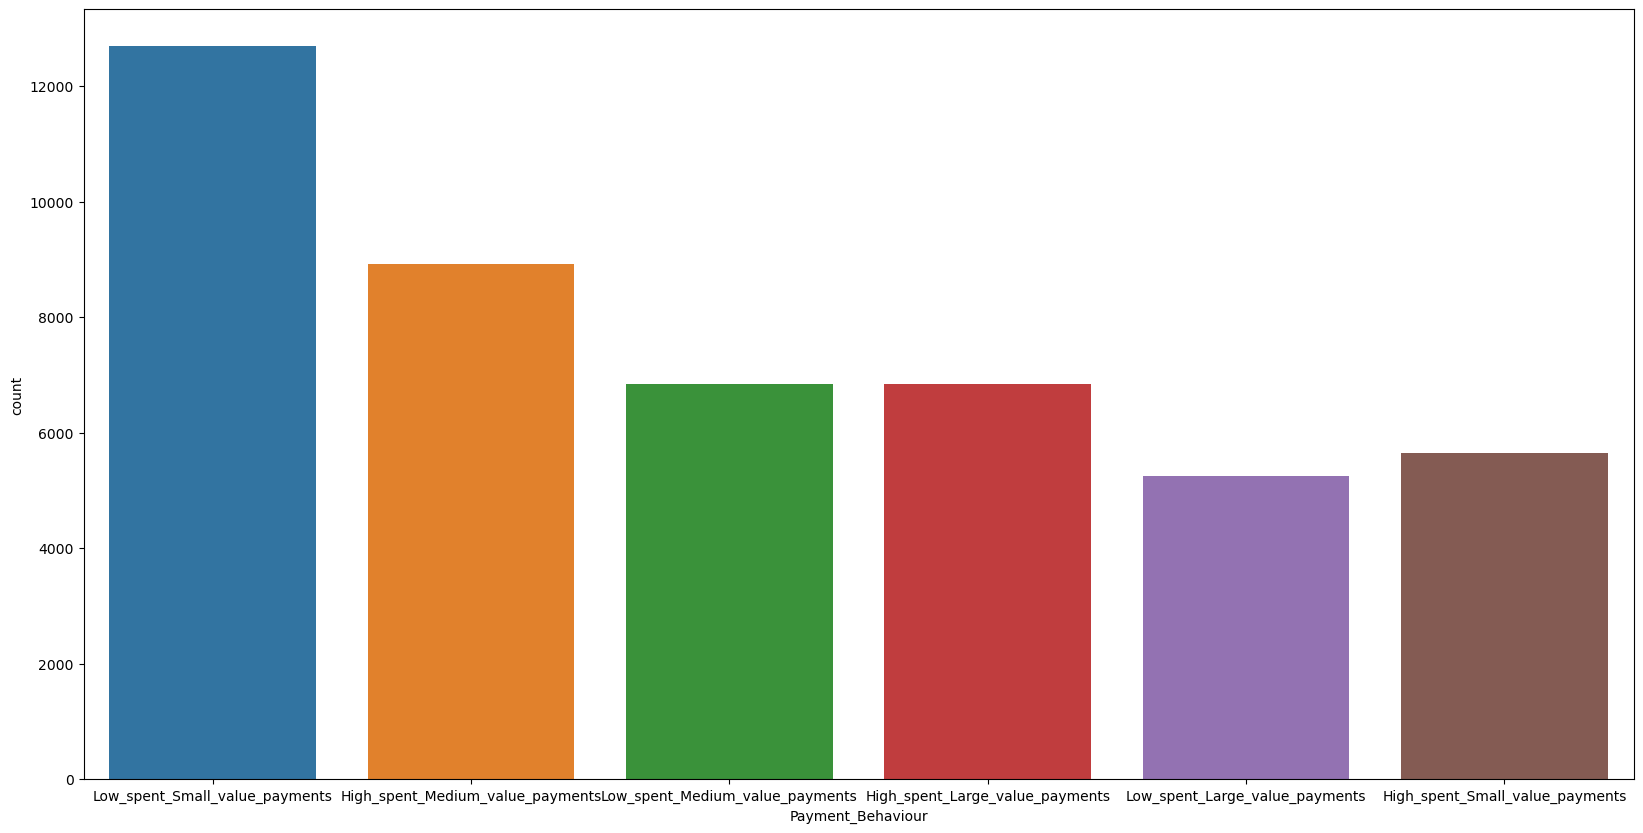

In [20]:
plt.figure(figsize=[20,10])
sn.countplot(x='Payment_Behaviour', data=data)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
data['Payment_Behaviour'] = le.fit_transform(data['Payment_Behaviour'])

In [23]:
data.head(3)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Payment_Behaviour,Credit_History_Age(days)
0,19114.12,1824.843333,3,809.98,35.030402,49.574949,5,8309.46
1,19114.12,1824.843333,3,809.98,33.053114,49.574949,1,8339.90
2,19114.12,1824.843333,3,809.98,33.811894,49.574949,4,0.00


In [24]:
print("Mapping for 'Payment_Behaviour':")
for original_value, numeric_code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original_value}: {numeric_code}")

Mapping for 'Payment_Behaviour':
High_spent_Large_value_payments: 0
High_spent_Medium_value_payments: 1
High_spent_Small_value_payments: 2
Low_spent_Large_value_payments: 3
Low_spent_Medium_value_payments: 4
Low_spent_Small_value_payments: 5


In [25]:
from imblearn.over_sampling import RandomOverSampler
rnd = RandomOverSampler()

In [26]:
x = data.drop('Payment_Behaviour' , axis = 1)
y = data['Payment_Behaviour']

In [27]:
y.value_counts()

Payment_Behaviour
5    12694
1     8922
0     6844
4     6837
2     5651
3     5252
Name: count, dtype: int64

In [28]:
x , y = rnd.fit_resample(x,y)

In [29]:
y.value_counts()

Payment_Behaviour
5    12694
1    12694
4    12694
0    12694
3    12694
2    12694
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x = mms.fit_transform(x)
x

array([[5.01784709e-04, 1.02087051e-01, 2.22345748e-03, ...,
        5.18024476e-01, 6.01652336e-04, 6.69119459e-01],
       [5.01784709e-04, 1.02087051e-01, 2.22345748e-03, ...,
        4.47485195e-01, 6.01652336e-04, 6.71570641e-01],
       [5.01784709e-04, 1.02087051e-01, 2.22345748e-03, ...,
        4.74554487e-01, 6.01652336e-04, 0.00000000e+00],
       ...,
       [4.79498532e-03, 6.75471853e-01, 5.55864369e-04, ...,
        1.52639313e-01, 1.88081634e-03, 8.16178282e-01],
       [4.36485797e-03, 6.00247087e-01, 2.77932185e-03, ...,
        3.50696204e-01, 1.09004930e-03, 8.82352941e-01],
       [4.73379200e-03, 6.77146183e-01, 1.66759311e-03, ...,
        2.55198550e-01, 2.31822799e-03, 7.03433587e-01]])

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

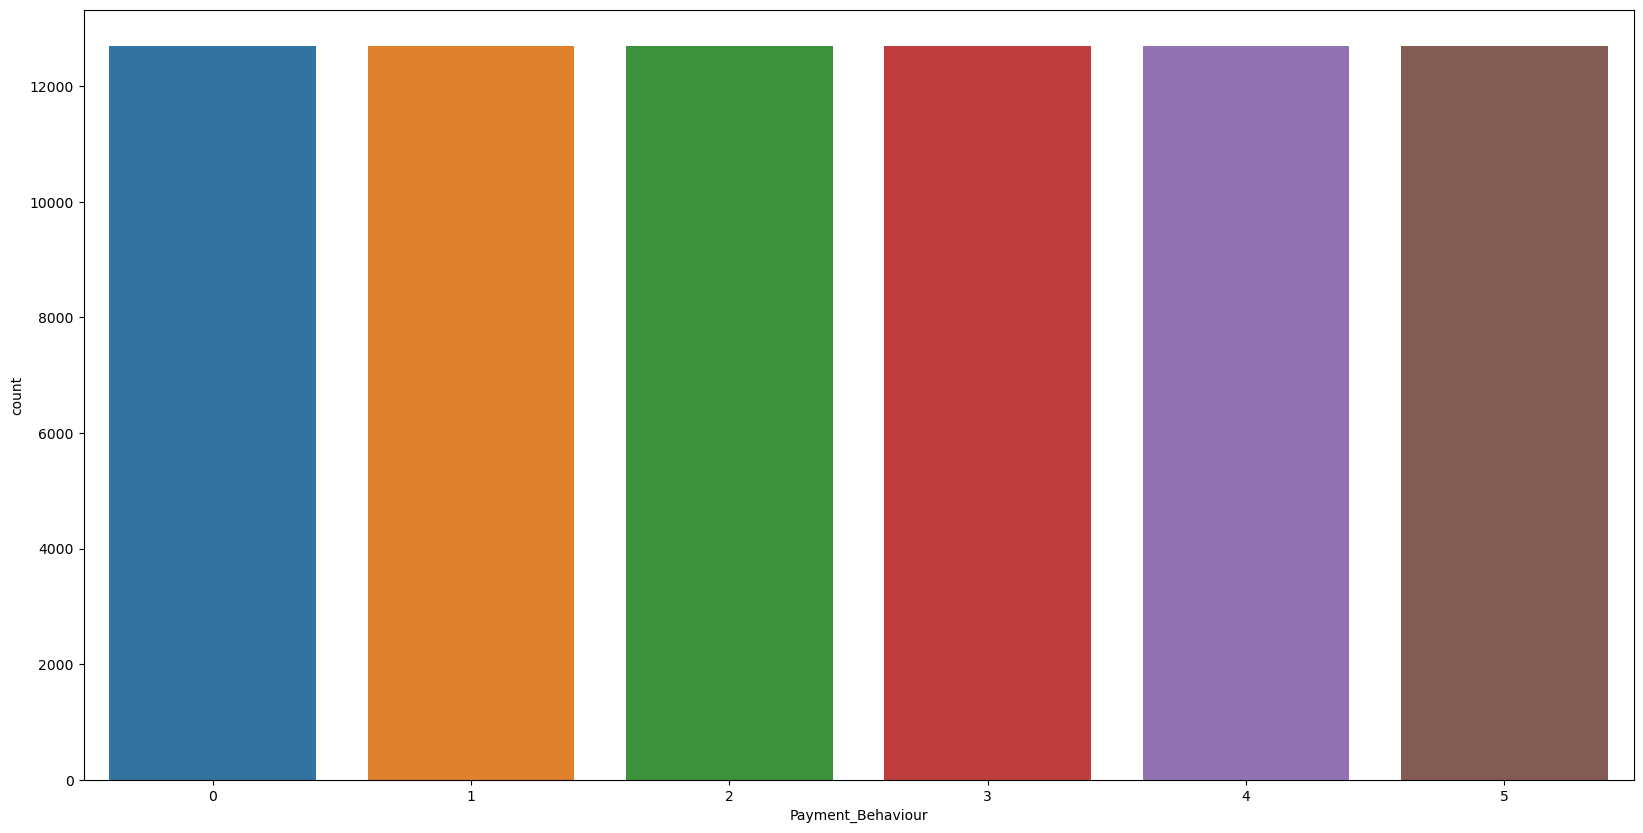

In [31]:
plt.figure(figsize=[20,10])
sn.countplot(x=y)

# Model Selection:

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rnd = RandomForestClassifier()



In [33]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y , random_state=1 , test_size=.25)

In [34]:
xtrain.shape

(57123, 7)

In [35]:
xtest.shape

(19041, 7)

In [36]:
rnd.fit(xtrain , ytrain)

RandomForestClassifier()

In [37]:
print("RandomForestClassifier Train Score " , rnd.score(xtrain , ytrain))

RandomForestClassifier Train Score  1.0


In [38]:
print("RandomForestClassifier Test Score " , rnd.score(xtest , ytest))

RandomForestClassifier Test Score  0.675489732682107


In [39]:
from sklearn.metrics import confusion_matrix , classification_report

In [40]:
cm = confusion_matrix(ytest , rnd.predict(xtest))
cm

array([[2412,  237,  119,   86,  142,  139],
       [ 414, 1788,  235,  178,  175,  362],
       [ 156,  148, 2474,   65,   93,  195],
       [ 114,  151,   84, 2638,   88,  179],
       [ 203,  170,  100,  106, 2256,  348],
       [ 283,  490,  343,  330,  446, 1294]], dtype=int64)

<Axes: >

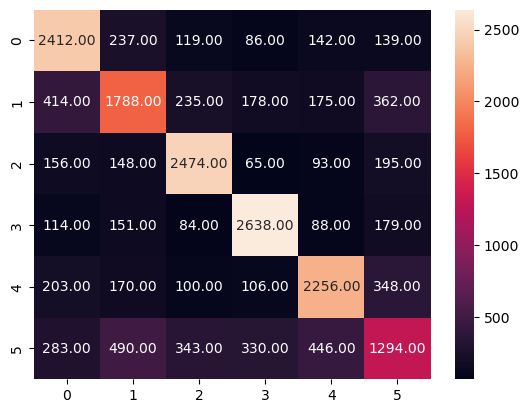

In [41]:
sn.heatmap(cm , annot = True , fmt=".2f")

In [42]:
print(classification_report(ytest , rnd.predict(xtest)))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      3135
           1       0.60      0.57      0.58      3152
           2       0.74      0.79      0.76      3131
           3       0.78      0.81      0.79      3254
           4       0.70      0.71      0.71      3183
           5       0.51      0.41      0.45      3186

    accuracy                           0.68     19041
   macro avg       0.67      0.68      0.67     19041
weighted avg       0.67      0.68      0.67     19041



# Hyperparameter Tuning:

In [43]:
Hrnd = RandomForestClassifier(n_estimators = 200)

In [44]:
Hrnd.fit(xtrain , ytrain)

RandomForestClassifier(n_estimators=200)

In [45]:
Hrnd.score(xtrain , ytrain)

1.0

In [46]:
Hrnd.score(xtest , ytest)

0.6786408276876215

In [47]:
from sklearn.model_selection import KFold, cross_val_score

In [48]:
kf=KFold(n_splits=10, shuffle=True)

In [49]:
result = cross_val_score(Hrnd, x, y, cv=kf) 

In [50]:
result

array([0.74071157, 0.72403834, 0.72640147, 0.72600761, 0.73490021,
       0.72859769, 0.73608193, 0.7238708 , 0.72557773, 0.73700105])